In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.0.0-preview2/spark-3.0.0-preview2-bin-hadoop2.7.tgz
!tar xf spark-3.0.0-preview2-bin-hadoop2.7.tgz
!pip install -q findspark

In [ ]:
!pip install pyspark==2.4.5

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-preview2-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

# spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
try:
    from pyspark import SparkContext, SparkConf
except ImportError as e:
    printmd('<<<<<!!!!! Please restart your kernel after installing Apache Spark !!!!!>>>>>')

In [ ]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown('# <span style="color:red">'+string+'</span>'))


#if ('sc' in locals() or 'sc' in globals()):
#    printmd('<<<<<!!!!! It seems that you are running in a IBM Watson Studio Apache Spark Notebook. Please run it in an IBM Watson Studio Default Runtime (without Apache Spark) !!!!!>>>>>')

In [ ]:
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

spark = SparkSession \
    .builder \
    .getOrCreate()

In [ ]:
df = spark.createDataFrame([{"hello": "world"} for x in range(1000)])
df.show(3)

/content/spark-3.0.0-preview2-bin-hadoop2.7/python/pyspark/sql/session.py:375: UserWarning: inferring schema from dict is deprecated,please use pyspark.sql.Row instead
  warnings.warn("inferring schema from dict is deprecated,"


+-----+
|hello|
+-----+
|world|
|world|
|world|
+-----+
only showing top 3 rows



In [ ]:
rdd = sc.parallelize(range(100))

In [ ]:
rdd.count()

100

In [ ]:
rdd.take(10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
rdd.collect()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

In [ ]:
rdd.map(lambda x: x + 1)

PythonRDD[11] at RDD at PythonRDD.scala:53

In [ ]:
rdd.map(lambda x: x + 1).take(5)

[1, 2, 3, 4, 5]

In [ ]:
sc.parallelize(range(1, 101)).reduce(lambda a,b: a+b)

5050

# Exercise 2

Now calculate covariance and correlation by using ApacheSpark

1st we crate two random RDD’s, which shouldn't correlate at all.

In [ ]:
import random
rddX = sc.parallelize(random.sample(list(range(100)),100))
rddY = sc.parallelize(random.sample(list(range(100)),100))

Now we calculate the mean, note that we explicitly cast the denominator to float in order to obtain a float instead of int

In [ ]:
meanX = rddX.sum()/float(rddX.count())
meanY = rddY.sum()/float(rddY.count())
print (meanX)
print (meanY)

49.5
49.5


Now calculate the covariance

In [ ]:
rddXY = rddX.zip(rddY)
covXY = rddXY.map(lambda x_y : (x_y[0]-meanX)*(x_y[1]-meanY)).sum()/rddXY.count()
covXY

108.45

calculate the indivicual standard deviations first

In [ ]:
from math import sqrt
n = rddXY.count()
sdX = sqrt(rddX.map(lambda x : pow(x-meanX,2)).sum()/n)
sdY = sqrt(rddY.map(lambda x : pow(x-meanY,2)).sum()/n)
print (sdX)
print (sdY)

28.86607004772212
28.86607004772212


Now we calculate the correlation

In [ ]:
corrXY = covXY / (sdX * sdY)
corrXY

0.13015301530153014

No we want to create a correlation matrix out of the four RDDs used in the lecture

In [ ]:
from pyspark.mllib.stat import Statistics
import random
column1 = sc.parallelize(range(100))
column2 = sc.parallelize(range(100,200))
column3 = sc.parallelize(list(reversed(range(100))))
column4 = sc.parallelize(random.sample(range(100),100))
data = column1.zip(column2).zip(column3).zip(column4).map(lambda a_b_c_d : (a_b_c_d[0][0][0],a_b_c_d[0][0][1],a_b_c_d[0][1],a_b_c_d[1]) ).map(lambda a_b_c_d : [a_b_c_d[0],a_b_c_d[1],a_b_c_d[2],a_b_c_d[3]])
print(Statistics.corr(data))

[[ 1.          1.         -1.         -0.09076508]
 [ 1.          1.         -1.         -0.09076508]
 [-1.         -1.          1.          0.09076508]
 [-0.09076508 -0.09076508  0.09076508  1.        ]]


In [ ]:
rdd = sc.parallelize(range(101))

In [ ]:
rdd.sortBy(lambda x: x).collect()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100]

# Excercise 3

Now it is time to grab a PARQUET file and create a dataframe out of it. Using SparkSQL you can handle it like a database.

In [ ]:
!wget https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true
!mv washing.parquet?raw=true washing.parquet

--2020-07-04 04:57:35--  https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/IBM/skillsnetwork/blob/master/coursera_ds/washing.parquet?raw=true [following]
--2020-07-04 04:57:35--  https://github.com/IBM/skillsnetwork/blob/master/coursera_ds/washing.parquet?raw=true
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/IBM/skillsnetwork/raw/master/coursera_ds/washing.parquet [following]
--2020-07-04 04:57:35--  https://github.com/IBM/skillsnetwork/raw/master/coursera_ds/washing.parquet
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IBM/skillsnetwork/master/coursera_ds/washing.parquet [fo

In [ ]:
df = spark.read.parquet('washing.parquet')

In [ ]:
df.count()

2058

In [ ]:
df.createOrReplaceTempView("washing")
spark.sql("SELECT * FROM washing").show()

+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|                 _id|                _rev|count|flowrate|fluidlevel|frequency|hardness|speed|temperature|           ts|voltage|
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|0d86485d0f88d1f9d...|1-57940679fb8a713...|    4|      11|acceptable|     null|      77| null|        100|1547808723923|   null|
|0d86485d0f88d1f9d...|1-15ff3a0b304d789...|    2|    null|      null|     null|    null| 1046|       null|1547808729917|   null|
|0d86485d0f88d1f9d...|1-97c2742b68c7b07...|    4|    null|      null|       71|    null| null|       null|1547808731918|    236|
|0d86485d0f88d1f9d...|1-eefb903dbe45746...|   19|      11|acceptable|     null|      75| null|         86|1547808738999|   null|
|0d86485d0f88d1f9d...|1-5f68b4c72813c25...|    7|    null|      null|       75|    null| null|   

In [ ]:
result = spark.sql("select voltage from washing where voltage is not null")
result_array = result.rdd.map(lambda row : row.voltage).sample(False,0.1).collect()

#just print the 1st 15 elements
result_array[:15]

[234, 236, 222, 228, 238, 226, 223, 231, 232, 227, 232, 226, 222, 250, 224]

In [ ]:
%matplotlib inline

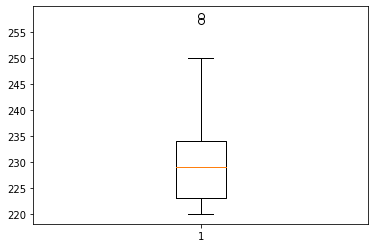

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(result_array)
plt.show()

In [ ]:
result = spark.sql("select voltage,ts from washing where voltage is not null order by ts asc")
result_rdd = result.rdd.sample(False,0.1).map(lambda row : (row.ts,row.voltage))
result_array_ts = result_rdd.map(lambda ts_voltage: ts_voltage[0]).collect() # when or how ts_voltage is defined? Sun
result_array_voltage = result_rdd.map(lambda ts_voltage: ts_voltage[1]).collect()
print(result_array_ts[:15])
print(result_array_voltage[:15])

[1547808734922, 1547808737926, 1547808740927, 1547808806965, 1547808815972, 1547808821976, 1547808836984, 1547808873042, 1547808888076, 1547808897083, 1547808906089, 1547808909090, 1547808915092, 1547808924097, 1547808972147]
[234, 234, 235, 221, 226, 230, 224, 234, 220, 223, 228, 239, 238, 225, 222]


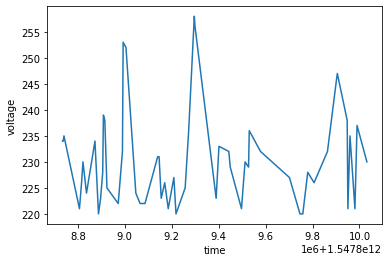

In [ ]:
plt.plot(result_array_ts,result_array_voltage)
plt.xlabel("time")
plt.ylabel("voltage")
plt.show()

In [ ]:
spark.sql("select min(ts),max(ts) from washing").show()

+-------------+-------------+
|      min(ts)|      max(ts)|
+-------------+-------------+
|1547808720911|1547810064867|
+-------------+-------------+



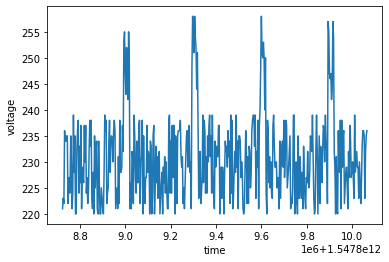

In [ ]:
result = spark.sql(
"""
select voltage,ts from washing 
    where voltage is not null and 
    ts > 1547808720911 and
    ts <= 1547810064867+3600000
    order by ts asc
""")
result_rdd = result.rdd.map(lambda row : (row.ts,row.voltage))
result_array_ts = result_rdd.map(lambda ts_voltage: ts_voltage[0]).collect()
result_array_voltage = result_rdd.map(lambda ts_voltage: ts_voltage[1]).collect()
plt.plot(result_array_ts,result_array_voltage)
plt.xlabel("time")
plt.ylabel("voltage")
plt.show()

In [ ]:
result_df = spark.sql("""
select hardness,temperature,flowrate from washing
    where hardness is not null and 
    temperature is not null and 
    flowrate is not null
""")
result_rdd = result_df.rdd.sample(False,0.1).map(lambda row : (row.hardness,row.temperature,row.flowrate))
result_array_hardness = result_rdd.map(lambda hardness_temperature_flowrate: hardness_temperature_flowrate[0]).collect()
result_array_temperature = result_rdd.map(lambda hardness_temperature_flowrate: hardness_temperature_flowrate[1]).collect()
result_array_flowrate = result_rdd.map(lambda hardness_temperature_flowrate: hardness_temperature_flowrate[2]).collect()

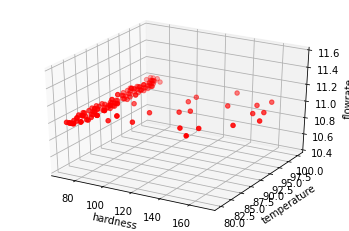

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(result_array_hardness,result_array_temperature,result_array_flowrate, c='r', marker='o')

ax.set_xlabel('hardness')
ax.set_ylabel('temperature')
ax.set_zlabel('flowrate')

plt.show()

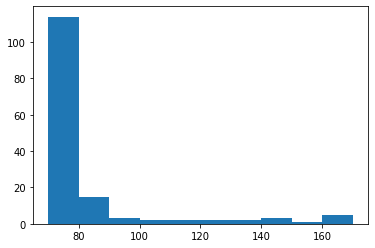

In [ ]:
plt.hist(result_array_hardness)
plt.show()

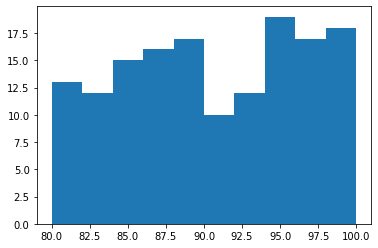

In [ ]:
plt.hist(result_array_temperature)
plt.show()

In [ ]:
result = spark.sql("""
SELECT * from (
    SELECT
    min(temperature) over w as min_temperature,
    max(temperature) over w as max_temperature, 
    min(voltage) over w as min_voltage,
    max(voltage) over w as max_voltage,
    min(flowrate) over w as min_flowrate,
    max(flowrate) over w as max_flowrate,
    min(frequency) over w as min_frequency,
    max(frequency) over w as max_frequency,
    min(hardness) over w as min_hardness,
    max(hardness) over w as max_hardness,
    min(speed) over w as min_speed,
    max(speed) over w as max_speed
    FROM washing 
    WINDOW w AS (ORDER BY ts ROWS BETWEEN CURRENT ROW AND 10 FOLLOWING) 
)
WHERE min_temperature is not null 
AND max_temperature is not null
AND min_voltage is not null
AND max_voltage is not null
AND min_flowrate is not null
AND max_flowrate is not null
AND min_frequency is not null
AND max_frequency is not null
AND min_hardness is not null
AND min_speed is not null
AND max_speed is not null   
""")

# not quite understand this. need more research

In [ ]:
df.count()-result.count()

7

In [ ]:
result.count()

2051

Now we import some classes from SparkML. PCA for the actual algorithm. Vectors for the data structure expected by PCA and VectorAssembler to transform data into these vector structures.

In [ ]:
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

Let's define a vector transformation helper class which takes all our input features (result.columns) and created one additional column called "features" which contains all our input features as one single column wrapped in "DenseVector" objects

In [ ]:
assembler = VectorAssembler(inputCols=result.columns, outputCol="features")

Now we actually transform the data, note that this is highly optimized code and runs really fast in contrast if we had implemented it.

In [ ]:
features = assembler.transform(result)

Let's have a look at how this new additional column "features" looks like:

In [ ]:
features.rdd.map(lambda r : r.features).take(10)

[DenseVector([81.0, 100.0, 221.0, 223.0, 11.0, 11.0, 68.0, 76.0, 71.0, 78.0, 1033.0, 1033.0]),
 DenseVector([81.0, 100.0, 221.0, 223.0, 11.0, 11.0, 68.0, 76.0, 72.0, 78.0, 1033.0, 1033.0]),
 DenseVector([81.0, 100.0, 221.0, 223.0, 11.0, 11.0, 68.0, 76.0, 72.0, 80.0, 1033.0, 1033.0]),
 DenseVector([81.0, 100.0, 222.0, 223.0, 11.0, 11.0, 68.0, 74.0, 72.0, 80.0, 1033.0, 1046.0]),
 DenseVector([81.0, 100.0, 222.0, 223.0, 11.0, 11.0, 68.0, 74.0, 73.0, 80.0, 1033.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 223.0, 11.0, 11.0, 68.0, 74.0, 73.0, 80.0, 1033.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 236.0, 11.0, 11.0, 68.0, 74.0, 73.0, 80.0, 1046.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 236.0, 11.0, 11.0, 68.0, 74.0, 73.0, 80.0, 1046.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 236.0, 11.0, 11.0, 71.0, 74.0, 73.0, 80.0, 1046.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 236.0, 11.0, 11.0, 71.0, 74.0, 73.0, 80.0, 1046.0, 1046.0])]

Since the source data set has been prepared as a list of DenseVectors we can now apply PCA. Note that the first line again only prepares the algorithm by finding the transformation matrices (fit method)

In [ ]:
pca = PCA(k=3, inputCol="features", outputCol="pcaFeatures")
model = pca.fit(features)

Now we can actually transform the data. Let's have a look at the first 20 rows

In [ ]:
result_pca = model.transform(features).select("pcaFeatures")
result_pca.show(truncate=False)

+----------------------------------------------------------+
|pcaFeatures                                               |
+----------------------------------------------------------+
|[1459.9789705815301,18.7452377818137,70.78430794789449]   |
|[1459.9954818287874,19.113431461685494,70.72738871418574] |
|[1460.0895843562396,20.96947106295569,70.75630600314616]  |
|[1469.69939294206,20.4031246476478,62.01356967480217]     |
|[1469.7159041893176,20.771318327519595,61.956650441093416]|
|[1469.7128317339768,20.7907511172548,61.89610667824968]   |
|[1478.353026457406,20.294557029761734,71.67550104802774]  |
|[1478.353026457406,20.294557029761734,71.67550104802774]  |
|[1478.3686036139297,20.260626897669283,71.63355353599673] |
|[1478.3686036139297,20.260626897669283,71.63355353599673] |
|[1483.5412027685188,20.006222577534125,66.82710394276796] |
|[1483.5171090224458,20.867020421616665,66.86707301946433] |
|[1483.4224268544053,19.875748236687734,66.93027077907936] |
|[1483.4224268544053,19.

So we obtained three completely new columns which we can plot now. Let run a final check if the number of rows is the same.

In [ ]:
result_pca.count()

2051

In [ ]:
rdd = result_pca.rdd.sample(False,0.8)

In [ ]:
x = rdd.map(lambda a : a.pcaFeatures).map(lambda a : a[0]).collect()

In [ ]:
y = rdd.map(lambda a : a.pcaFeatures).map(lambda a : a[1]).collect()

In [ ]:
z = rdd.map(lambda a : a.pcaFeatures).map(lambda a : a[2]).collect()

Finally we plot the three lists and name each of them as dimension 1-3 in the plot

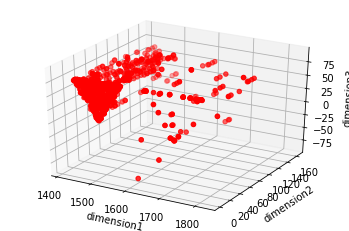

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(x,y,z, c='r', marker='o')

ax.set_xlabel('dimension1')
ax.set_ylabel('dimension2')
ax.set_zlabel('dimension3')

plt.show()